Respecting the respective authors is of utmost importance thus citations will be at the top. All coming notebooks' references will be placed at the top.

Courtesy to "A high-bias,low-variance introduction to Machine Learning for physicists"
Mehta, P., Bukov, M., Wang, C., Day, A., Richardson, C., Fisher, C. and Schwab, D., 2019. A high-bias, low-variance introduction to Machine Learning for physicists. Physics Reports, 810, pp.1-124. (Accessed on 18 July 2020)

The nature of distance changes in high dimensions, as evidenced in the derivation of the Maxwell distribution in statistical physics where the fact that all the volume of a d-dimensional sphere of radius r is contained in a small spherical shell around r is exploited. Almost all critical points of a function (i.e., the points where all derivatives vanish) are saddles rather than maxima or minima (an observation first made in physics in the context of the p-spin spherical spin glass). For all these reasons, it turns out that for complicated models studied in ML, predicting and fitting are very different things.

Hence, the objective of this notebook is to fit data with polynomials of different order (Also known as polynomial regression) and subsequently test the fitted model. 

## Polynomial Feature Definition
Polynomial features are those features created by raising existing features to an exponent. For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2

This notebook gives the reader an intuition about the major challenges that any machine learning algorithm faces.

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, the "noise" in the data, and our knowledge about relevant features. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation
$$
    y_i= f(x_i) + \eta_i,
$$
where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that
$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make prediction, we will consider a family of functions $g_\alpha(x;\theta_\alpha)$ that depend on some parameters $\theta_\alpha$. These functions respresent the **model class** that we are using to try to model the data and make predictions. The $g_\alpha(x;\theta_\alpha)$ encode the class of **features** we are using to represent the data.

To learn the parameters $\boldsymbol{\theta}$, we will train our models on a **training data set** and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.  


For the remainder of the notebook, we will focus on polynomial regression. Our task is to model the data with polynomials and make predictions about the new data that we have not seen.
We will consider two qualitatively distinct situations: 
<ul>
<li> In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
<li>In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial but $g_\alpha(x;\theta_\alpha)$ are polynomials of order 1 or 3.
</ul>

This notebook mainly considers 3 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.
</ul>

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$


## Fitting vs. predicting when the data is in the model class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials). 


## Fitting vs. predicting when the data is not in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .


# Training the models:

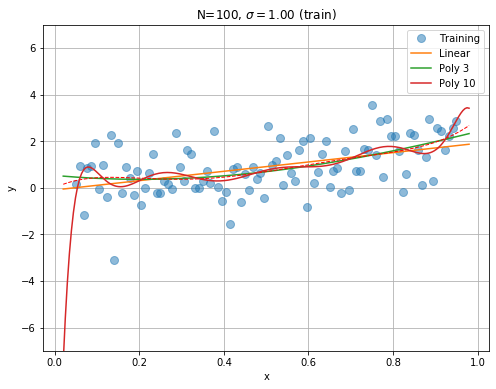

In [5]:
#This is Python Notebook to walk through polynomial regression examples
#We will use this to think about regression
import numpy as np
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(8, 6))

# The Training Data
N_train=100
sigma_train=1;

# Train on integers
x=np.linspace(0.05,0.95,N_train)
# Draw Gaussian random noise
s = sigma_train*np.random.randn(N_train)

#linear
y=2*x+s

# Tenth Order
# y=2*x-10*x**5+15*x**10+s

p1=plt.plot(x, y, "o", ms=8, alpha=0.5, label='Training')
                                    #LINEAR REGRESSION
# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()

# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1):
clf.fit(x[:, np.newaxis], y)

# Use fitted linear model to predict the y value:
xplot=np.linspace(0.02,0.98,200) # grid of points, some are in the training set, some are not
linear_plot=plt.plot(xplot, clf.predict(xplot[:, np.newaxis]), label='Linear')
                                    #POLYNOMIAL REGRESSION
# Polynomial Regression
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)


Xplot=poly3.fit_transform(xplot[:,np.newaxis])
poly3_plot=plt.plot(xplot, clf3.predict(Xplot), label='Poly 3')

## Fifth order polynomial
# poly5 = PolynomialFeatures(degree=5)
# X = poly5.fit_transform(x[:,np.newaxis])
# clf5 = linear_model.LinearRegression()
# clf5.fit(X,y)

# Xplot=poly5.fit_transform(xplot[:,np.newaxis])
# plt.plot(xplot, clf5.predict(Xplot), 'r--',linewidth=1)

poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(xplot[:,np.newaxis])
poly10_plot=plt.plot(xplot, clf10.predict(Xplot), label='Poly 10')

plt.legend(loc='best')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")


# Linear Filename
filename_train="train-linear_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Tenth Order Filename
#filename_train="train-o10_N=%i_noise=%.2f.pdf"%(N_train, sigma_train)

# Saving figure and showing results
plt.savefig(filename_train)
plt.grid()
plt.show()


# Testing the fitted models

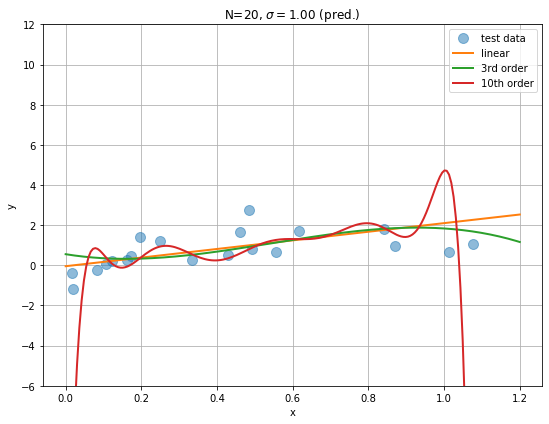

In [2]:
# Generate Test Data
%matplotlib inline
# Number of test data
N_test=20
sigma_test=sigma_train

# Generate random grid points (x) in the interval [0, max_x]:
# Note some points will be drawn outside the training interval
max_x=1.2
x_test=max_x*np.random.random(N_test)

# Draw random Gaussian noise
s_test = sigma_test*np.random.randn(N_test)

# Linear
y_test=2*x_test+s_test
# Tenth order
#y_test=2*x_test-10*x_test**5+15*x_test**10+s_test

# Make design matrices for prediction
x_plot=np.linspace(0,max_x, 200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(8, 6))

p1=plt.plot(x_test, y_test, 'o', ms=10, alpha=0.5, label='test data')
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), lw=2, label='linear')
p3=plt.plot(x_plot,clf3.predict(X3), lw=2, label='3rd order')
p10=plt.plot(x_plot,clf10.predict(X10), lw=2, label='10th order')


plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,12))

# Linear Filename
filename_test="pred-linear_N=%i_noise=%.2f.pdf"%(N_test, sigma_test)

# Tenth Order Filename
#filename_test=Title+"pred-o10.pdf"

# Saving figure and showing results
plt.savefig(filename_test)
plt.grid()
plt.show()